# 輪郭: 初めの一歩
## 目的
* 輪郭とは何なのかを理解する
* 輪郭の検出方法，描画方法を学ぶ
* 以下の関数の使い方を学ぶ : <A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=cv2.find#cv2.findContours" target="_blank"> cv2.findContours()</A>,
<A HREF="http://docs.opencv.org/3.0-beta/modules/imgproc/doc/drawing_functions.html?highlight=cv2.draw#cv2.drawContours" target="_blank">cv2.drawContours()</A>


## 輪郭とは何か？
輪郭とは、同じ色や値を持つ(境界線に沿った)連続する点をつなげて形成される曲線のことと言うことができる．形状解析や物体追跡，物体認識で役に立つツールである．

* 精度よく輪郭を検出するために，二値画像を使う．そのため，まず初めに閾値処理やCannyのエッジ検出などにより二値画像を取得する．
* `cv2.findContours()` 関数は入力画像を変える処理である．輪郭検出後の処理で入力画像を使用する必要がある場合は，別の変数に予めコピーしておくこと．
* OpenCVの輪郭検出は，黒い背景から白い物体の輪郭を検出することと仮定している．物体は白(明るい色)，背景は黒(暗い色)と覚えておこう．

それでは二値画像から輪郭を検出する方法を見ていこう: (<A HREF="http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_imgproc/py_contours/py_contours_begin/test.jpg">使用するサンプル画像</A>)。 

<font color="blue">注意</font>: OpenCV2では `cv2.findContours()`関数は`contours`と`hierarchy`の２つを返すため、コードを修正しないといけない)

<function matplotlib.pyplot.show>

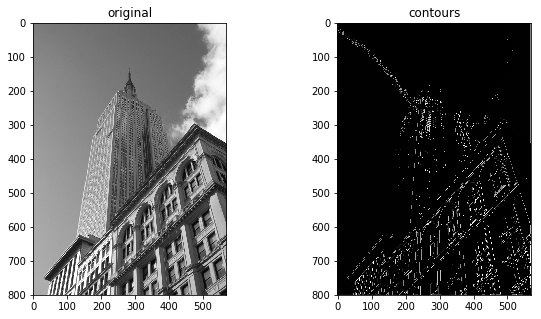

In [19]:
%matplotlib inline
import numpy as np
import cv2

imgray = cv2.imread('test.jpg',0)
#imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imgray,'gray'), plt.title('original')
plt.subplot(1,2,2)
plt.imshow(image,'gray'), plt.title('contours')
plt.show

In [18]:
print(hierarchy.shape)

(1, 2117, 4)


このように`cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]])` 関数は(少なくとも)3個の引数をとる関数である．第1引数`image`は入力画像，第2引数`mode`は輪郭抽出モード，第3引数`method`は輪郭検出方法を指定するフラグである．出力は輪郭画像と輪郭，それに輪郭の階層情報の３つである． 輪郭 とは検出された全輪郭をPythonのlistとして出力するもので、list内の各輪郭は輪郭上の点の`(x,y)`座標をNumpyのarrayとして保存されている．

<font color="blue">Note</font>:第２引数と第３引数及び輪郭の階層情報については後述する．それまではサンプルコードで指定しているフラグや値を使えば輪郭がうまく検出できると思っておこう．

## 輪郭を描画する方法
検出した輪郭を描画するには `cv2.drawContours(image, contours, contourIdx, color[, thickness[, lineType[, hierarchy[, maxLevel[, offset]]]]])` 関数を使う．この関数は境界上に点を持つ形状であれば，輪郭以外の形状の描画にも使える．第1引数`image`は入力画像，第2引数`contours`はPythonのlistとして保存されている輪郭，第3引数`contourIdx`は描画したい輪郭のインデックス(第2引数で与えた輪郭のlistから一つの輪郭だけを描画したいとき、輪郭の指定に使う．全輪郭を描画する時は$-1$を指定する．)，以降の引数は輪郭を描画する色(color)や線の太さ(thickness)といった情報である．

画像中の全輪郭を描画するには:

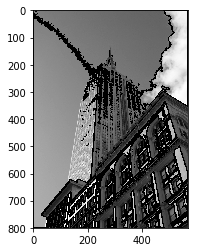

In [28]:
imgray = cv2.imread('test.jpg',0)
img = cv2.drawContours(imgray, contours, -1, (0,255,0), 3)
plt.imshow(img,'gray')

画像中の輪郭の内，一つだけ(ここでは4番目の輪郭)を描画するには:

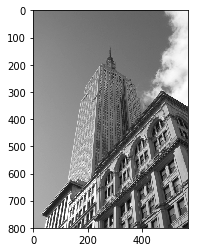

In [31]:
imgray = cv2.imread('test.jpg',0)
img = cv2.drawContours(imgray, contours, 3, (0,255,0), 3)
plt.imshow(img,'gray')

よく使うのは以下の方法:

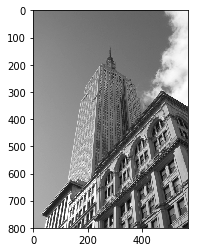

In [32]:
imgray = cv2.imread('test.jpg',0)
ret,thresh = cv2.threshold(imgray,127,255,0)
cnt = contours[4]
img = cv2.drawContours(imgray, [cnt], 0, (0,255,0), 3)
plt.imshow(img,'gray')

<font color="blue">Note</font> 2番目と3番目の描画方法は同じように見えるが，後で3番目の方法が便利だと分かるようになるだろう．

## 輪郭の近似方法
これは `cv2.findContours(image, mode, method[, contours[, hierarchy[, offset]]])` 関数の第3引数`method`のことであるが，具体的に何を指しているのだろうか?

前述したように，輪郭とは同じ値を持つ形状の境界を指し，境界線上の点の`(x,y)`座標をデータとして格納している．しかし，本当に全ての点の座標を保存しているだろうか？これが`method`で指定されることなのである．

`method`の値として `cv2.CHAIN_APPROX_NONE` を指定すれば輪郭上の全点の情報を保持する．しかし，本当に全点の情報が必要なのだろうか？例えば，直線の輪郭を検出したとして，検出した線を表現するのに境界上の全ての点の情報を保持する必要があるだろうか。直線ならば，その直線の端点のみを保持するだけで十分のはずである．かくして、`cv2.CHAIN_APPROX_SIMPLE` を指定すれば，輪郭を圧縮して冗長な点の情報を削除し，メモリの使用を抑えることができる．

次の例では長方形が描いてある画像に対し近似した輪郭の検出を行ったものである．`array`として保存している輪郭内の全点を青い円で描画している．左の画像は `cv2.CHAIN_APPROX_NONE` フラグを指定し、検出した点は(734個)である。右の画像は `cv2.CHAIN_APPROX_SIMPLE` フラグを指定し、検出した点はたったの4個である．これで近似方法の指定によって、どれだけメモリ消費を抑えられるかお分かりになるだろう!
![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/_images/none.jpg)

In [56]:
%matplotlib inline
import numpy as np
import cv2

imgray = cv2.imread('simpleBox.png',0)

ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
image2, contours2, hierarchy2 = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [65]:
print(contours[0].shape)

(1040, 1, 2)


In [66]:
print(contours2[0].shape)

(4, 1, 2)


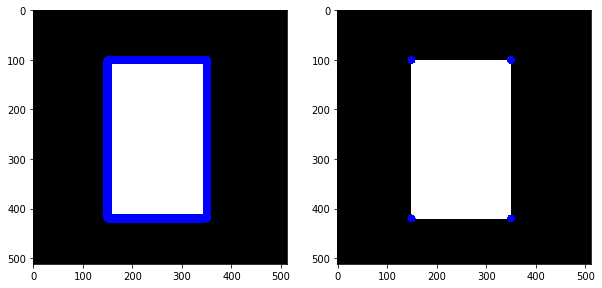

In [98]:
img=cv2.imread('simpleBox.png')
img2 = np.copy(img)
for x in contours[0]:
    cv2.circle(img,tuple(x[0]), 8, (0,0,255), -1)
for x in contours2[0]:
    cv2.circle(img2,tuple(x[0]), 8, (0,0,255), -1)
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(img2)
plt.show()

## 目次
* [最初に戻る]( http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/usingOpenCV.html )
* 一つ上: OpenCVにおける輪郭(領域)<BR>
http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contours.html
* 前の学習項目 [画像ピラミッド pyramids.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/pyramids.html)<BR>
画像ピラミッドと画像ピラミッドを使ったブレンディングを学ぶ．
* 次の学習項目 [領域(輪郭)の特徴 contourFeatures.ipynb](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/Notebook/contourFeatures.ipynb)<BR>
輪郭(領域)の様々な特徴(面積，周囲長，外接矩形など)を学ぶ．